In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind, norm


## Aleix's lesson exercises

In [3]:
# Parameters
n = 100  # Number of samples
m_A = 1.1  # Mean of distribution A
m_B = 1.3  # Mean of distribution B
sd = 1  # Standard deviation
iterations = 1000  # Number of simulations

In [12]:
# Create distributions
distr_A = np.random.normal(m_A, sd, n)
distr_B = np.random.normal(m_B, sd, n)

# Find distribution means
av_A = np.mean(distr_A)
av_B = np.mean(distr_B)

# Print and check if first mean is larger (usually false, but sometimes true)
print(av_A, av_B)
print(av_A > av_B)

1.0916851392270701 1.3685058660262017
False


In [5]:
# Storing values
false_count = 0
diffs = []

# Simulation loop
for _ in range(iterations):
    # Generate random samples and calculate means
    av_A = np.mean(np.random.normal(m_A, sd, n))
    av_B = np.mean(np.random.normal(m_B, sd, n))
    
    # Callculate and store the difference
    diff = av_B - av_A
    diffs.append(diff)

    # Check if av_A > av_B is False
    if av_A <= av_B:
        false_count += 1

# Print results
print(f"Number of times av_A > av_B is False: {false_count}")
print(f"Proportion of False outcomes: {false_count / iterations}")

print(diffs)

Number of times av_A > av_B is False: 905
Proportion of False outcomes: 0.905
[np.float64(0.04620207931951281), np.float64(0.3496830070426369), np.float64(-0.004654130287732983), np.float64(0.02291722730029), np.float64(0.30256750803159327), np.float64(0.4672003496720847), np.float64(0.2732399958869385), np.float64(0.34317024992547474), np.float64(0.04465631740157372), np.float64(0.4106698516830575), np.float64(0.07614503531929184), np.float64(0.15983075240589129), np.float64(0.2632087280613007), np.float64(0.2377335070132327), np.float64(0.24716368454913917), np.float64(0.18030792791030847), np.float64(0.1298414741806353), np.float64(0.24541408668200604), np.float64(0.2619832574616223), np.float64(0.2662488183924565), np.float64(0.30314414396573786), np.float64(0.25953778254099635), np.float64(0.2519314711391727), np.float64(0.13667674309009326), np.float64(0.18705101140831903), np.float64(0.17419142896881268), np.float64(0.1323367958844035), np.float64(0.2959586761356162), np.float64

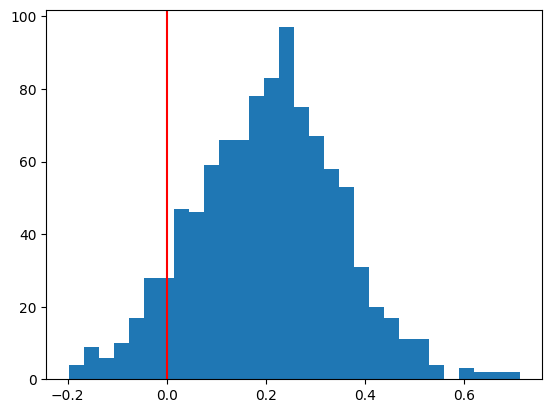

In [6]:
plt.hist(diffs, 30)
plt.axvline(0, c='red')
plt.show()

In [7]:
rounded_diffs = np.round(diffs, 2) #needed as otherwise each value is unique (then first value is picked as mode)

vals, counts = np.unique(rounded_diffs, return_counts=True)
mode_index = np.argmax(counts)
mode = vals[mode_index]

print(mode)

0.24


In [8]:
# Find the difference from the latest run
diff_single = av_B - av_A

# Perform a t-test - for independent samples of scores
t_stat, p_value_ttest = ttest_ind(distr_B, distr_A)

# Display results
print(f"Difference in means (d): {diff_single}")
print(f"t-test statistic: {t_stat}")
print(f"p-value (t-test): {p_value_ttest}")

Difference in means (d): 0.2382547249949123
t-test statistic: 0.5676065968058546
p-value (t-test): 0.5709451529192131


The lower the p-value, the greater the statistical significance of the observed difference. A p-value of 0.05 or lower is generally considered statistically significant.


### Take-outs

In [9]:
# Calculate p-value using the normal distribution approximation
combined_std = np.std(np.concatenate((distr_B, distr_A)), ddof=1)
p_value_norm = 2 * norm.cdf(diff_single, loc=0, scale=np.sqrt(2) * combined_std / np.sqrt(n))

print(f"p-value (normal approximation): {p_value_norm}")


p-value (normal approximation): 1.8782300616457985
